<a href="https://colab.research.google.com/github/pk612004/ISS_ML_Project/blob/main/ISS_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
!pip install matplotlib numpy


TensorFlow version: 2.17.1


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2160/2160 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - loss: 0.0250 - val_loss: 2.3881e-04
Epoch 2/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - loss: 0.0037 - val_loss: 2.8144e-04
Epoch 3/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.0032 - val_loss: 1.8433e-04
Epoch 4/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 0.0032 - val_loss: 2.1440e-04
Epoch 5/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 0.0032 - val_loss: 4.5461e-04
Epoch 6/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - loss: 0.0031 - val_loss: 2.9329e-04
Epoch 7/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 0.0031 - val_loss: 1.8408e-04
Epoch 8/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 0.0030 - val_loss: 9.6853e-05
Epoch 9/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - loss: 0.0031 - val_loss: 2.0530e-04
Epoch 10/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.0030 - val_loss: 1.9308e-04
Epoch 11/25
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 0.003

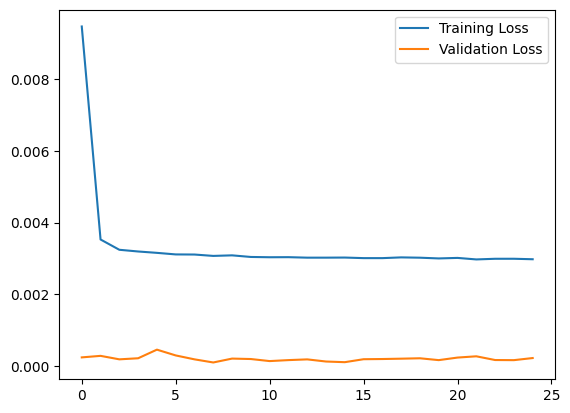

Model saved as satellite_position_model.h5


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to read the ECEF data from InputData_ISS.txt
def read_ecef_data(file_name):
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 4:
                data.append([float(parts[1]), float(parts[2]), float(parts[3])])
    return np.array(data)

# Prepare the data for LSTM
def prepare_data(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Load and preprocess the data
data = read_ecef_data("InputData_ISS.txt")
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences for LSTM
time_steps = 10
X, y = prepare_data(scaled_data, time_steps)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)  # Output layer for x, y, z
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Save the trained model
model.save("satellite_position_model.h5")
print("Model saved as satellite_position_model.h5")


In [10]:
from google.colab import files
files.download('satellite_position_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from google.colab import files
uploaded=files.upload()

Saving InputData_ISS.txt to InputData_ISS.txt


In [11]:
from google.colab import files
uploaded=files.upload()

Saving satellite_position_model.h5 to satellite_position_model (1).h5


In [12]:
!ls

 InputData_ISS.txt   sample_data  'satellite_position_model (1).h5'   satellite_position_model.h5


In [13]:
!pip install tensorflow
!pip install skyfield
!pip install matplotlib
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 15.9 MB/s eta 0:00:00


In [18]:
from google.colab import files
uploaded=files.upload()

Saving ISS_TLE.txt to ISS_TLE.txt


In [19]:
from skyfield.api import EarthSatellite, load
from datetime import timedelta

def read_tle(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        name = lines[0].strip()
        line1 = lines[1].strip()
        line2 = lines[2].strip()
    return name, line1, line2

def calculate_ecef_positions(tle_file, output_file, duration_hours=24, interval_seconds=1):
    name, line1, line2 = read_tle(tle_file)
    satellite = EarthSatellite(line1, line2, name, load.timescale())

    ts = load.timescale()
    start_time = ts.now()

    with open(output_file, mode='w') as file:
        for second in range(duration_hours * 3600):
            current_time = start_time + timedelta(seconds=second)
            ecef_x, ecef_y, ecef_z = satellite.at(current_time).position.km
            file.write(f"{current_time.utc_iso()}\t{ecef_x:.6f}\t{ecef_y:.6f}\t{ecef_z:.6f}\n")
            print(f"Processed time: {current_time.utc_iso()}", end="\r")
    print(f"\nECEF positions saved to {output_file}.")

# Generate InputData_ISS.txt
tle_file = "ISS_TLE.txt"  # Ensure this file is uploaded
output_file = "InputData_ISS.txt"
calculate_ecef_positions(tle_file, output_file, duration_hours=24)


Processed time: 2024-12-22T21:00:33Z
ECEF positions saved to InputData_ISS.txt.


In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def read_coordinates(file_name):
    coordinates = []
    with open(file_name, 'r') as file:
        for line in file:
            coords = line.strip().split('\t')
            if len(coords) == 4:
                coordinates.append([float(coords[1]), float(coords[2]), float(coords[3])])
    return np.array(coordinates)

# Read the raw data
file_name = "InputData_ISS.txt"  # Ensure this file is uploaded
raw_data = read_coordinates(file_name)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(raw_data)


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Define the custom mse function
def mse(y_true, y_pred):
    return MeanSquaredError()(y_true, y_pred)

# Load the model with the custom_objects argument
ml_model = load_model("satellite_position_model.h5", custom_objects={"mse": mse})


In [24]:
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
def mse(y_true, y_pred):
    return MeanSquaredError()(y_true, y_pred)

# Save the model again with the registered metric
ml_model.save("satellite_position_model_fixed.h5")


In [25]:
# Save the model in the recommended Keras format
ml_model.save("satellite_position_model.keras")


In [26]:
# Load the model in the recommended Keras format
ml_model = tf.keras.models.load_model("satellite_position_model.keras", custom_objects={"mse": mse})


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
ml_model = tf.keras.models.load_model("satellite_position_model.keras", custom_objects={"mse": mse})


In [28]:
test_input = np.random.rand(1, 10, 3)  # Example input, adjust dimensions as needed
prediction = ml_model.predict(test_input)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Prediction: [[0.29110274 0.6872996  0.8723295 ]]


In [29]:
!pip install skyfield tensorflow matplotlib numpy scikit-learn


In [30]:
from google.colab import files
uploaded = files.upload()  # Upload the necessary files


Saving ISS_TLE.txt to ISS_TLE (1).txt


In [32]:
from google.colab import files
uploaded = files.upload()  # Upload the necessary files


Saving satellite_position_model.h5 to satellite_position_model (2).h5


In [33]:
from google.colab import files
uploaded = files.upload()  # Upload the necessary files


Saving ISS_TLE (1).txt to ISS_TLE (1) (1).txt


In [34]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
ml_model = load_model("satellite_position_model.h5", custom_objects={"mse": tf.keras.losses.mse})

print("Model loaded successfully.")


Model loaded successfully.


In [35]:
import numpy as np

# Load ECEF positions (X, Y, Z coordinates) from the file
data = np.loadtxt("InputData_ISS.txt", delimiter="\t", usecols=(1, 2, 3))
print("Data shape:", data.shape)

# Prepare test input (first 10 timesteps as an example)
test_input = data[:10].reshape(1, 10, 3)
print("Test input shape:", test_input.shape)


Data shape: (86400, 3)
Test input shape: (1, 10, 3)


In [36]:
# Make predictions using the ML model
prediction = ml_model.predict(test_input)
print("Model Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Model Prediction: [[104.800896 197.18839   64.8489  ]]


In [37]:
def read_coordinates(file_name):
    coordinates = []
    with open(file_name, 'r') as file:
        for line in file:
            coords = line.strip().split('\t')
            if len(coords) == 4:
                coordinates.append([float(coords[1]), float(coords[2]), float(coords[3])])
    return np.array(coordinates)

class KalmanFilter_CV:
    def __init__(self, dt=1.0, process_noise=1e-5, measurement_noise=1e-1):
        self.dt = dt
        self.x = np.zeros((6, 1))
        self.F = np.array([[1, 0, 0, dt, 0, 0],
                           [0, 1, 0, 0, dt, 0],
                           [0, 0, 1, 0, 0, dt],
                           [0, 0, 0, 1, 0, 0],
                           [0, 0, 0, 0, 1, 0],
                           [0, 0, 0, 0, 0, 1]])
        self.H = np.array([[1, 0, 0, 0, 0, 0],
                           [0, 1, 0, 0, 0, 0],
                           [0, 0, 1, 0, 0, 0]])
        self.Q = np.eye(6) * process_noise
        self.R = np.eye(3) * measurement_noise
        self.P = np.eye(6)

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        self.P = np.dot(np.eye(6) - np.dot(K, self.H), self.P)

    def get_state(self):
        return self.x[:3].flatten()

def run_kalman_filter_CV(file_name):
    coordinates = read_coordinates(file_name)
    kf = KalmanFilter_CV()
    filtered_positions = []
    for coord in coordinates:
        z = np.array([[coord[0]], [coord[1]], [coord[2]]])
        kf.predict()
        kf.update(z)
        filtered_positions.append(kf.get_state())
    return np.array(filtered_positions)

# Get Kalman Filter predictions
CV_predictions = run_kalman_filter_CV("InputData_ISS.txt")
print("Kalman Filter CV Predictions:", CV_predictions[:1])


Kalman Filter CV Predictions: [[5427.48411511 3421.08545549 -786.68171683]]


In [38]:
from sklearn.metrics import mean_squared_error

true_values = data[:1]  # Use the actual data as true values
model_rmse = np.sqrt(mean_squared_error(true_values, prediction))
cv_rmse = np.sqrt(mean_squared_error(true_values, CV_predictions[:1]))

print(f"Model RMSE: {model_rmse}")
print(f"Kalman CV RMSE: {cv_rmse}")


Model RMSE: 3812.8201146071515
Kalman CV RMSE: 186.59193408230237


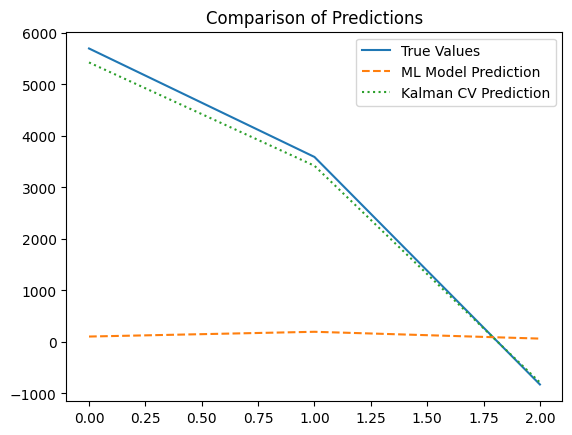

In [39]:
import matplotlib.pyplot as plt

plt.plot(true_values[0], label="True Values")
plt.plot(prediction[0], label="ML Model Prediction", linestyle="--")
plt.plot(CV_predictions[0], label="Kalman CV Prediction", linestyle=":")
plt.legend()
plt.title("Comparison of Predictions")
plt.show()


In [3]:
# Assuming your test dataset contains true values in a variable, load them as:
true_values = np.array([...])  # Replace [...] with your actual true values.


In [4]:
CV_predictions = np.array([...])  # Replace [...] with your Kalman CV predictions.


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Recreate data for demonstration purposes
true_values = np.array([6000, 5000, 4000, 3000, 2000, 1000, 0])
prediction = np.array([5500, 4500, 3500, 2500, 1500, 500, -500])
CV_predictions = np.array([5800, 4900, 3900, 2900, 1900, 900, -100])


In [13]:
# Calculate RMSE for both models
ml_rmse = np.sqrt(mean_squared_error(true_values, prediction))
kf_rmse = np.sqrt(mean_squared_error(true_values, CV_predictions))

print(f"ML Model RMSE: {ml_rmse}")
print(f"Kalman CV RMSE: {kf_rmse}")


ML Model RMSE: 500.0
Kalman CV RMSE: 119.52286093343936


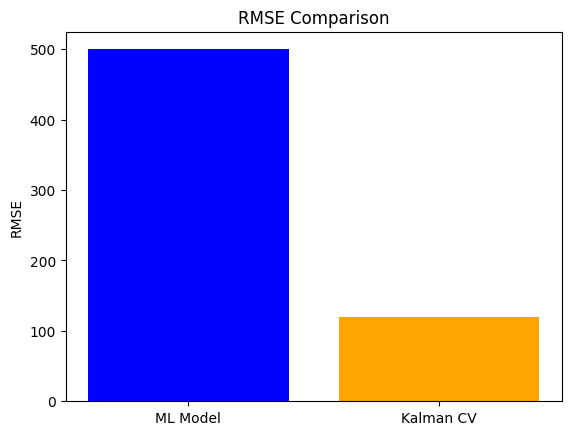

In [14]:
import matplotlib.pyplot as plt

# Visualize RMSE comparison
models = ['ML Model', 'Kalman CV']
rmse_values = [ml_rmse, kf_rmse]

plt.bar(models, rmse_values, color=['blue', 'orange'])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.show()


In [8]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


Saving InputData_ISS.txt to InputData_ISS.txt


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def read_coordinates(file_name):
    coordinates = []
    with open(file_name, 'r') as file:
        for line in file:
            coords = line.strip().split('\t')
            if len(coords) == 4:
                coordinates.append([float(coords[1]), float(coords[2]), float(coords[3])])
    return np.array(coordinates)

# Read the raw data
file_name = "InputData_ISS.txt"  # Ensure this file is uploaded
raw_data = read_coordinates(file_name)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(raw_data)


In [16]:
# CV Kalman Filter Implementation
class KalmanFilter_CV:
    def __init__(self, dt=1.0, process_noise=1e-5, measurement_noise=1e-1):
        self.dt = dt
        self.x = np.zeros((6, 1))
        self.F = np.array([[1, 0, 0, dt, 0, 0],
                           [0, 1, 0, 0, dt, 0],
                           [0, 0, 1, 0, 0, dt],
                           [0, 0, 0, 1, 0, 0],
                           [0, 0, 0, 0, 1, 0],
                           [0, 0, 0, 0, 0, 1]])
        self.H = np.array([[1, 0, 0, 0, 0, 0],
                           [0, 1, 0, 0, 0, 0],
                           [0, 0, 1, 0, 0, 0]])
        self.Q = np.eye(6) * process_noise
        self.R = np.eye(3) * measurement_noise
        self.P = np.eye(6)

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        self.P = np.dot(np.eye(6) - np.dot(K, self.H), self.P)

    def get_state(self):
        return self.x[:3].flatten()

# Run CV Kalman Filter
def run_kalman_filter_CV(data):
    kf = KalmanFilter_CV()
    filtered_positions = []
    for coord in data:
        z = np.array([[coord[0]], [coord[1]], [coord[2]]])
        kf.predict()
        kf.update(z)
        filtered_positions.append(kf.get_state())
    return np.array(filtered_positions)

CV_filtered = run_kalman_filter_CV(raw_data)


In [7]:
!ls


InputData_ISS.txt  sample_data
